# Referancr

https://colab.research.google.com/drive/1sWSXR-Ul5HhET6dvWqWM3kLj8uuDRzcR?usp=sharing

# Getting Started

In [ ]:
!pip install transformers rouge_score evaluate datasets

In [ ]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


# Using a Trained Model

In [ ]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/config.json
Model config VisionEncoderDecoderConfig {
  "_commit_hash": "0e334c70dc5258966aa5775757804d4b62f70125",
  "_name_or_path": "vit-gpt-pt",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "bos_token_id": 50256,
  "decoder": {
    "_name_or_path": "",
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": 50256,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_leng

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/pytorch_model.bin
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

All model checkpoint weights were used when initializing VisionEncoderDecoderModel.

All the weights of VisionEncoderDecoderModel were initialized from the model checkpoint at nlpconnect/vit-gpt2-image-captioning.
If your task is similar to the task the model of the checkpoint was trained on, you can already use VisionEncoderDecoderModel for predictions without further training.
Generation config file not found, using a generation co

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/tokenizer_config.json


loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/0e334c70dc5258966aa5775757804d4b62f70125/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [ ]:
import urllib.parse as parse
import os

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)


# a function to perform inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)
    # preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = model.generate(**img)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

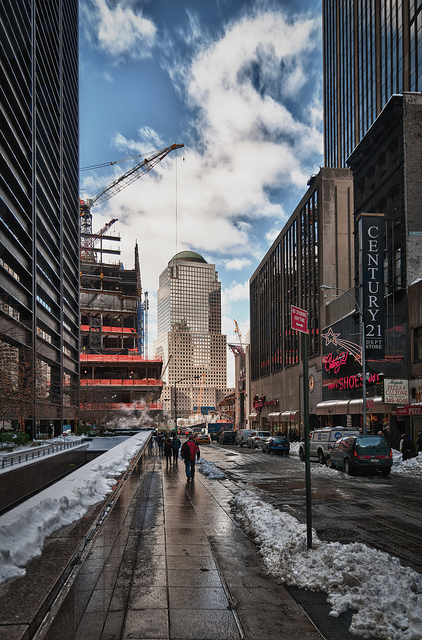

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a person walking down a street with a snow covered sidewalk '

In [ ]:
# load displayer
from IPython.display import display

url = "http://images.cocodataset.org/test-stuff2017/000000009384.jpg"
display(load_image(url))
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)

# Fine-tuning your Own Image Captioning Model

## Loading the Model

In [ ]:
# the encoder model that process the image and return the image features
# encoder_model = "WinKawaks/vit-small-patch16-224"
# encoder_model = "google/vit-base-patch16-224"
# encoder_model = "google/vit-base-patch16-224-in21k"
encoder_model = "microsoft/swin-base-patch4-window7-224-in22k"
# the decoder model that process the image features and generate the caption text
# decoder_model = "bert-base-uncased"
# decoder_model = "prajjwal1/bert-tiny"
decoder_model = "gpt2"
# load the model
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_model, decoder_model
).to(device)

In [ ]:
# initialize the tokenizer
# tokenizer = AutoTokenizer.from_pretrained(decoder_model)
tokenizer = GPT2TokenizerFast.from_pretrained(decoder_model)
# tokenizer = BertTokenizerFast.from_pretrained(decoder_model)
# load the image processor
image_processor = ViTImageProcessor.from_pretrained(encoder_model)

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_ran

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--microsoft--swin-base-patch4-window7-224-in22k/snapshots/790d9b6014f6d157cc34d70afc0604eccc92dadd/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [ ]:
if "gpt2" in decoder_model:
  # gpt2 does not have decoder_start_token_id and pad_token_id
  # but has bos_token_id and eos_token_id
  tokenizer.pad_token = tokenizer.eos_token # pad_token_id as eos_token_id
  model.config.eos_token_id = tokenizer.eos_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  # set decoder_start_token_id as bos_token_id
  model.config.decoder_start_token_id = tokenizer.bos_token_id
else:
  # set the decoder start token id to the CLS token id of the tokenizer
  model.config.decoder_start_token_id = tokenizer.cls_token_id
  # set the pad token id to the pad token id of the tokenizer
  model.config.pad_token_id = tokenizer.pad_token_id

## Downloading & Loading the Dataset

In [ ]:
from datasets import load_dataset

max_length = 32 # max length of the captions in tokens
coco_dataset_ratio = 50 # 50% of the COCO2014 dataset
train_ds = load_dataset("HuggingFaceM4/COCO", split=f"train[:{coco_dataset_ratio}%]")
valid_ds = load_dataset("HuggingFaceM4/COCO", split=f"validation[:{coco_dataset_ratio}%]")
test_ds = load_dataset("HuggingFaceM4/COCO", split="test")
len(train_ds), len(valid_ds), len(test_ds)

Computing checksums:  50%|#####     | 1/2 [01:16<01:16, 76.07s/it]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset coco downloaded and prepared to /root/.cache/huggingface/datasets/HuggingFaceM4___coco/2014/1.0.0/7dba4b1d9b12e588770263b87c2a1fd7b03072c0a0cf550c896dbd09bf2bb7f8. Subsequent calls will reuse this data.


(283374, 12505, 25010)

## Preprocessing the Inputs

In [ ]:
import numpy as np

# remove the images with less than 3 dimensions (possibly grayscale images)
train_ds = train_ds.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)
valid_ds = valid_ds.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)
test_ds = test_ds.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)

#1:   0%|          | 0/142 [00:00<?, ?ba/s]

#0:   0%|          | 0/142 [00:00<?, ?ba/s]

#1:   0%|          | 0/7 [00:00<?, ?ba/s]

#0:   0%|          | 0/7 [00:00<?, ?ba/s]

#0:   0%|          | 0/13 [00:00<?, ?ba/s]

#1:   0%|          | 0/13 [00:00<?, ?ba/s]

In [ ]:
def preprocess(items):
  # preprocess the image
  pixel_values = image_processor(items["image"], return_tensors="pt").pixel_values.to(device)
  # tokenize the caption with truncation and padding
  targets = tokenizer([ sentence["raw"] for sentence in items["sentences"] ],
                      max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
  return {'pixel_values': pixel_values, 'labels': targets["input_ids"]}


# using with_transform to preprocess the dataset during training
train_dataset = train_ds.with_transform(preprocess)
valid_dataset = valid_ds.with_transform(preprocess)
test_dataset  = test_ds.with_transform(preprocess)

In [ ]:
# a function we'll use to collate the batches
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.stack([x['labels'] for x in batch])
    }

## Evaluation Metrics

In [ ]:
import evaluate

# load the rouge and bleu metrics
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

def compute_metrics(eval_pred):
  preds = eval_pred.label_ids
  labels = eval_pred.predictions
  # decode the predictions and labels
  pred_str = tokenizer.batch_decode(preds, skip_special_tokens=True)
  labels_str = tokenizer.batch_decode(labels, skip_special_tokens=True)
  # compute the rouge score
  rouge_result = rouge.compute(predictions=pred_str, references=labels_str)
  # multiply by 100 to get the same scale as the rouge score
  rouge_result = {k: round(v * 100, 4) for k, v in rouge_result.items()}
  # compute the bleu score
  bleu_result = bleu.compute(predictions=pred_str, references=labels_str)
  # get the length of the generated captions
  generation_length = bleu_result["translation_length"]
  return {
        **rouge_result,
        "bleu": round(bleu_result["bleu"] * 100, 4),
        "gen_len": bleu_result["translation_length"] / len(preds)
  }

## Training

In [ ]:
num_epochs = 2 # number of epochs
batch_size = 16 # the size of batches

In [ ]:
for item in train_dataset:
  print(item["labels"].shape)
  print(item["pixel_values"].shape)
  break

torch.Size([32])
torch.Size([3, 224, 224])


### Using the Trainer Class

In [ ]:
# define the training arguments
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,             # use generate to calculate the loss
    num_train_epochs=num_epochs,            # number of epochs
    evaluation_strategy="steps",            # evaluate after each eval_steps
    eval_steps=2000,                        # evaluate after each 2000 steps
    logging_steps=2000,                     # log after each 2000 steps
    save_steps=2000,                        # save after each 2000 steps
    per_device_train_batch_size=batch_size, # batch size for training
    per_device_eval_batch_size=batch_size,  # batch size for evaluation
    output_dir="vit-swin-base-224-gpt2-image-captioning", # output directory
    # push_to_hub=True # whether you want to push the model to the hub,
    # check this guide for more details: https://huggingface.co/transformers/model_sharing.html
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,                     # the instantiated 🤗 Transformers model to be trained
    tokenizer=image_processor,       # we use the image processor as the tokenizer
    args=training_args,              # pass the training arguments
    compute_metrics=compute_metrics, # pass the compute metrics function
    train_dataset=train_dataset,     # pass the training dataset
    eval_dataset=valid_dataset,      # pass the validation dataset
    data_collator=collate_fn,        # pass the collate function
)

In [ ]:
from torch.utils.data import DataLoader

def get_eval_loader(eval_dataset=None):
  return DataLoader(valid_dataset, collate_fn=collate_fn, batch_size=batch_size)

def get_test_loader(eval_dataset=None):
  return DataLoader(test_dataset, collate_fn=collate_fn, batch_size=batch_size)

# override the get_train_dataloader, get_eval_dataloader and
# get_test_dataloader methods of the trainer
# so that we can properly load the data
trainer.get_train_dataloader = lambda: DataLoader(train_dataset, collate_fn=collate_fn, batch_size=batch_size)
trainer.get_eval_dataloader = get_eval_loader
trainer.get_test_dataloader = get_test_loader

In [ ]:
# train the model
trainer.train()

In [ ]:
# evaluate on the test_dataset
trainer.evaluate(test_dataset)

In [ ]:
# if you set the push_to_hub parameter in the trainingarguments
# finish the pushing using the below code
trainer.push_to_hub()

In [ ]:
# to free up GPU memory
import gc
# del predictions
# del outputs
# del labels
torch.cuda.empty_cache()
gc.collect()

92

###Using PyTorch Training Loop

In [ ]:
# alternative way of training: pytorch loop
from torch.utils.data import DataLoader

# define our data loaders
train_dataset_loader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
valid_dataset_loader = DataLoader(valid_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)
test_dataset_loader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)

In [ ]:
from torch.optim import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

In [ ]:
# start tensorboard
%load_ext tensorboard
%tensorboard --logdir ./image-captioning/tensorboard

In [ ]:
# Training loop
from torch.utils.tensorboard import SummaryWriter

summary_writer = SummaryWriter(log_dir="./image-captioning/tensorboard")

# print some statistics before training
# number of training steps
n_train_steps = num_epochs * len(train_dataset_loader)
# number of validation steps
n_valid_steps = len(valid_dataset_loader)
# current training step
current_step = 0
# logging, eval & save steps
save_steps = 1000

In [ ]:
for epoch in range(num_epochs):
    # set the model to training mode
    model.train()
    # initialize the training loss
    train_loss = 0
    for batch in tqdm(train_dataset_loader, "Training", total=len(train_dataset_loader), leave=False):
      if current_step % save_steps == 0:
        ### evaluation code ###
        # evaluate on the validation set
        # if the current step is a multiple of the save steps
        print()
        print(f"Validation at step {current_step}...")
        print()
        # set the model to evaluation mode
        model.eval()
        # initialize our lists that store the predictions and the labels
        predictions, labels = [], []
        # initialize the validation loss
        valid_loss = 0
        for batch in valid_dataset_loader:
            # get the batch
            pixel_values = batch["pixel_values"]
            label_ids = batch["labels"]
            # forward pass
            outputs = model(pixel_values=pixel_values, labels=label_ids)
            # get the loss
            loss = outputs.loss
            valid_loss += loss.item()
            # free the GPU memory
            logits = outputs.logits.detach().cpu()
            # add the predictions to the list
            predictions.extend(logits.argmax(dim=-1).tolist())
            # add the labels to the list
            labels.extend(label_ids.tolist())
        # make the EvalPrediction object that the compute_metrics function expects
        eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
        # compute the metrics
        metrics = compute_metrics(eval_prediction)
        # print the stats
        print()
        print(f"Epoch: {epoch}, Step: {current_step}, Train Loss: {train_loss / save_steps:.4f}, " +
              f"Valid Loss: {valid_loss / n_valid_steps:.4f}, BLEU: {metrics['bleu']:.4f}, " +
              f"ROUGE-1: {metrics['rouge1']:.4f}, ROUGE-2: {metrics['rouge2']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}")
        print()
        # log the metrics
        summary_writer.add_scalar("valid_loss", valid_loss / n_valid_steps, global_step=current_step)
        summary_writer.add_scalar("bleu", metrics["bleu"], global_step=current_step)
        summary_writer.add_scalar("rouge1", metrics["rouge1"], global_step=current_step)
        summary_writer.add_scalar("rouge2", metrics["rouge2"], global_step=current_step)
        summary_writer.add_scalar("rougeL", metrics["rougeL"], global_step=current_step)
        # save the model
        model.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
        tokenizer.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
        image_processor.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
        # get the model back to train mode
        model.train()
        # reset the train and valid loss
        train_loss, valid_loss = 0, 0
      ### training code below ###
      # get the batch & convert to tensor
      pixel_values = batch["pixel_values"]
      labels = batch["labels"]
      # forward pass
      outputs = model(pixel_values=pixel_values, labels=labels)
      # get the loss
      loss = outputs.loss
      # backward pass
      loss.backward()
      # update the weights
      optimizer.step()
      # zero the gradients
      optimizer.zero_grad()
      # log the loss
      loss_v = loss.item()
      train_loss += loss_v
      # increment the step
      current_step += 1
      # log the training loss
      summary_writer.add_scalar("train_loss", loss_v, global_step=current_step)


Training:   0%|          | 0/17669 [00:00<?, ?it/s]


Validation at step 1000...



Configuration saved in ./image-captioning/checkpoint-1000/config.json
Configuration saved in ./image-captioning/checkpoint-1000/generation_config.json



Epoch: 0, Step: 1000, Train Loss: 0.0000, Valid Loss: 1.0927, BLEU: 8.1102, ROUGE-1: 42.6778, ROUGE-2: 13.0396, ROUGE-L: 40.6797



Model weights saved in ./image-captioning/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./image-captioning/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-1000/special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-1000/preprocessor_config.json
Training:   6%|▌         | 1000/17669 [24:51<4:38:49,  1.00s/it]


Validation at step 2000...



Configuration saved in ./image-captioning/checkpoint-2000/config.json
Configuration saved in ./image-captioning/checkpoint-2000/generation_config.json



Epoch: 0, Step: 2000, Train Loss: 1.0966, Valid Loss: 0.9991, BLEU: 10.8885, ROUGE-1: 46.1669, ROUGE-2: 16.6826, ROUGE-L: 44.4348



Model weights saved in ./image-captioning/checkpoint-2000/pytorch_model.bin
tokenizer config file saved in ./image-captioning/checkpoint-2000/tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-2000/special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-2000/preprocessor_config.json
Training:  11%|█▏        | 2000/17669 [49:38<4:33:30,  1.05s/it]


Validation at step 3000...



Configuration saved in ./image-captioning/checkpoint-3000/config.json
Configuration saved in ./image-captioning/checkpoint-3000/generation_config.json



Epoch: 0, Step: 3000, Train Loss: 1.0323, Valid Loss: 0.9679, BLEU: 11.6235, ROUGE-1: 47.1454, ROUGE-2: 17.6634, ROUGE-L: 45.5163



Model weights saved in ./image-captioning/checkpoint-3000/pytorch_model.bin
tokenizer config file saved in ./image-captioning/checkpoint-3000/tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-3000/special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-3000/preprocessor_config.json


KeyboardInterrupt: ignored

In [ ]:
# load the best model, change the checkpoint number to the best checkpoint
# if the last checkpoint is the best, then ignore this cell
best_checkpoint = 3000
best_model = VisionEncoderDecoderModel.from_pretrained(f"./image-captioning/checkpoint-{best_checkpoint}").to(device)

# Models Evaluation

In [ ]:
def get_evaluation_metrics(model, dataset):
  model.eval()
  # define our dataloader
  dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=batch_size)
  # number of testing steps
  n_test_steps = len(dataloader)
  # initialize our lists that store the predictions and the labels
  predictions, labels = [], []
  # initialize the test loss
  test_loss = 0.0
  for batch in tqdm(dataloader, "Evaluating"):
      # get the batch
      pixel_values = batch["pixel_values"]
      label_ids = batch["labels"]
      # forward pass
      outputs = model(pixel_values=pixel_values, labels=label_ids)
      # outputs = model.generate(pixel_values=pixel_values, max_length=max_length)
      # get the loss
      loss = outputs.loss
      test_loss += loss.item()
      # free the GPU memory
      logits = outputs.logits.detach().cpu()
      # add the predictions to the list
      predictions.extend(logits.argmax(dim=-1).tolist())
      # add the labels to the list
      labels.extend(label_ids.tolist())
  # make the EvalPrediction object that the compute_metrics function expects
  eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
  # compute the metrics
  metrics = compute_metrics(eval_prediction)
  # add the test_loss to the metrics
  metrics["test_loss"] = test_loss / n_test_steps
  return metrics

In [ ]:
metrics = get_evaluation_metrics(best_model, test_dataset)
metrics

Evaluating: 100%|██████████| 6230/6230 [17:10<00:00,  6.04it/s]


{'rouge1': 46.9427,
 'rouge2': 17.659,
 'rougeL': 45.2971,
 'rougeLsum': 45.2916,
 'bleu': 11.7049,
 'gen_len': 11.262560192616373,
 'test_loss': 0.9731424459819809}

In [ ]:
finetuned_metrics = get_evaluation_metrics(finetuned_model, test_dataset)
finetuned_metrics

Evaluating: 100%|██████████| 6230/6230 [15:13<00:00,  6.82it/s]


{'rouge1': 48.624,
 'rouge2': 20.5349,
 'rougeL': 47.0933,
 'rougeLsum': 47.0975,
 'bleu': 11.7336,
 'gen_len': 11.262560192616373,
 'test_loss': 9.437558887552106}

In [ ]:
# using the pipeline API
image_captioner = pipeline("image-to-text", model="Abdou/vit-swin-base-224-gpt2-image-captioning")
image_captioner.model = image_captioner.model.to(device)

In [ ]:
get_evaluation_metrics(image_captioner.model, test_dataset)

Evaluating: 100%|██████████| 6230/6230 [16:50<00:00,  6.17it/s]


{'rouge1': 53.1153,
 'rouge2': 24.2307,
 'rougeL': 51.5002,
 'rougeLsum': 51.4983,
 'bleu': 17.7765,
 'gen_len': 11.262560192616373,
 'test_loss': 0.7988893618313879}

# Performing Inference

In [ ]:
def show_image_and_captions(url):
  # get the image and display it
  display(load_image(url))
  # get the captions on various models
  our_caption = get_caption(best_model, image_processor, tokenizer, url)
  finetuned_caption = get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)
  pipeline_caption = get_caption(image_captioner.model, image_processor, tokenizer, url)
  # print the captions
  print(f"Our caption: {our_caption}")
  print(f"nlpconnect/vit-gpt2-image-captioning caption: {finetuned_caption}")
  print(f"Abdou/vit-swin-base-224-gpt2-image-captioning caption: {pipeline_caption}")

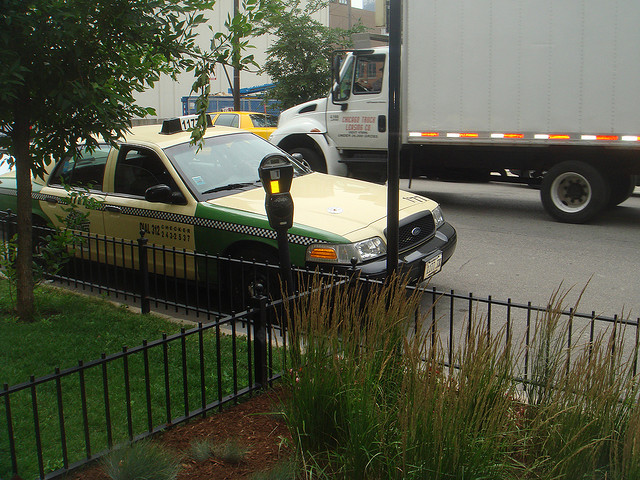

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}



Our caption: A truck parked in a parking lot with a man on the back.
nlpconnect/vit-gpt2-image-captioning caption: a green truck parked next to a curb 
Abdou/vit-swin-base-224-gpt2-image-captioning caption: A police car parked next to a fence.


In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000001.jpg")

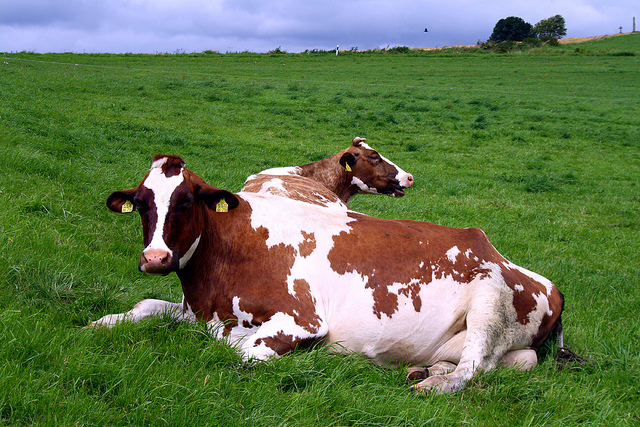

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}



Our caption: A cow standing in a field with a bunch of grass.
nlpconnect/vit-gpt2-image-captioning caption: a cow is standing in a field of grass 
Abdou/vit-swin-base-224-gpt2-image-captioning caption: Two cows laying in a field with a sky background.


In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000019.jpg")

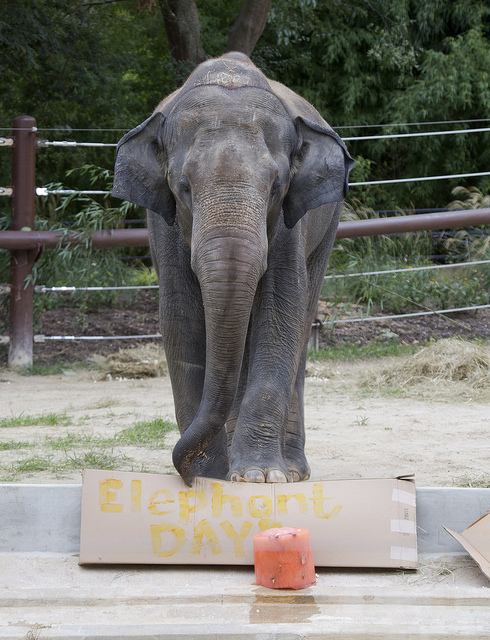

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}



Our caption: A large elephant standing in a dirt field.
nlpconnect/vit-gpt2-image-captioning caption: an elephant with a large trunk standing on a dirt ground 
Abdou/vit-swin-base-224-gpt2-image-captioning caption: An elephant standing next to a box on a cement ground.


In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000128.jpg")

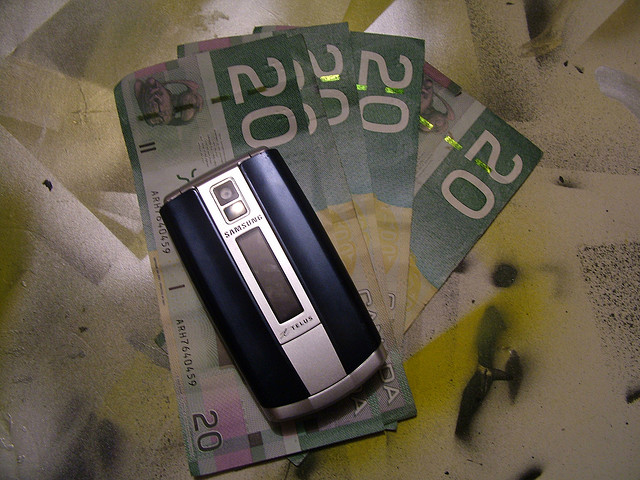

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}



Our caption: A small phone sitting on a table.
nlpconnect/vit-gpt2-image-captioning caption: a cell phone sitting on top of a table 
Abdou/vit-swin-base-224-gpt2-image-captioning caption: A cell phone sitting on top of a paper.


In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003072.jpg")

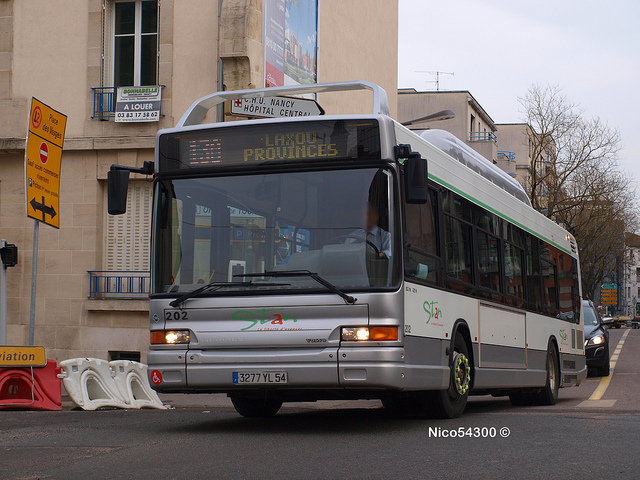

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}



Our caption: A bus is parked on the side of a street.
nlpconnect/vit-gpt2-image-captioning caption: a city bus is parked on the side of the road 
Abdou/vit-swin-base-224-gpt2-image-captioning caption: A bus is parked on the side of the road.


In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003324.jpg")

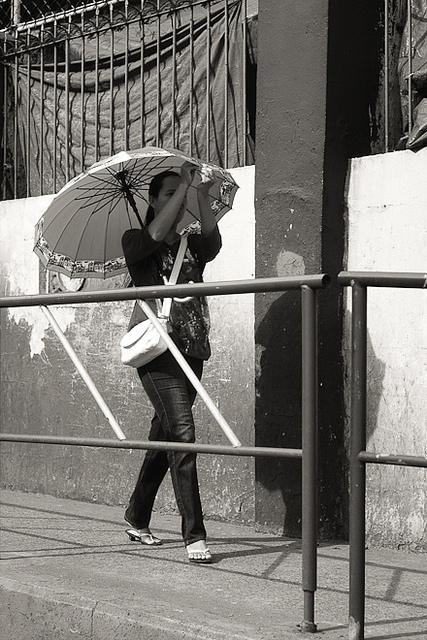

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256,
  "transformers_version": "4.26.0"
}



Our caption: A woman standing on a sidewalk with a umbrella.
nlpconnect/vit-gpt2-image-captioning caption: a person walking down a street holding an umbrella 
Abdou/vit-swin-base-224-gpt2-image-captioning caption: A woman holding an umbrella walking down a sidewalk.


In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003720.jpg")